<h1 style="text-align:center;color:green">Predicción humedad a las 3 pm a partír de los features calculados entre las 8:55 am y 9:04 am por método de regresión</h1>

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<h3> Cargamos los datos </h3>

In [4]:
data = pd.read_csv('meteo/diario.csv')
data.columns
data.shape

(1095, 11)

In [7]:
data.head(10)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


<h3>Comenzamos a revisar la información y a limpiar información inservible, también revisamos que variables nos interesan</h3>

In [8]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


<h3>Comenzamos borrando los valores nulos y eliminamos la columna number que no nos serviría para el ejercicio...</h3>

In [9]:
data = data.dropna()
del data['number']

In [10]:
data.head(20)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


<h3>Ahora vamos a seleccionar cuales columnas van a ser nuestros features y cuales serían nuestro target, en este caso
    nuestro target sería relative_humidity_3pm y el resto de columnas serían nuestros features, por otro lado, haciendo
    un análisis visual, vemos que las columnas rain_acumulation_9am y rain_duration_9am tiene casi todos lo valores en 0
    lo que hace pensar que durante el tiempo de estudio no hubo mucha lluvia y estas características no está influyendo de
    manera relevante en el cálculo...</h3>

In [11]:
features = ['air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am','max_wind_direction_9am','max_wind_speed_9am','relative_humidity_9am']
target = ['relative_humidity_3pm']
x = data[features]
y = data[target]

<h3>Vemos como quedan las features...</h3>

In [12]:
x.head(10)

,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,relative_humidity_9am
0,74.822000,271.100000,2.080354,295.400000,2.863283,42.420000
1,71.403843,101.935179,2.443009,140.471548,3.533324,24.328697
2,60.638000,51.000000,17.067852,63.700000,22.100967,8.900000
3,70.138895,198.832133,4.337363,211.203341,5.190045,12.189102
4,44.294000,277.800000,1.856660,136.500000,2.863283,92.410000
5,78.404000,182.800000,9.932014,189.000000,10.983375,35.130000
6,70.043304,177.875407,3.745587,186.606696,4.589632,10.657422
7,51.710000,242.400000,2.527742,271.600000,3.646212,80.470000
8,80.582000,40.700000,4.518619,63.000000,5.883152,29.580000
9,47.498000,163.100000,4.943637,195.900000,6.576604,88.600000


<h3>Ahora el target...</h3>

In [13]:
y.head(10)

,relative_humidity_3pm
0,36.160000
1,19.426597
2,14.460000
3,12.742547
4,76.740000
5,33.930000
6,21.385657
7,74.920000
8,24.030000
9,68.050000


<h3>Se realiza una revisión visual de las features respecto al target con el fin de verificar si se ve alguna correlación
entre ellas. Primero con la presión del aire a las 9am <i>(este se elimina después de hacer pruebas ya que elevaba bastante el 
    error cuadrático medio)</i>...</h3>

In [14]:
#plt.scatter(x['air_pressure_9am'],y,color="darkgreen", label="Data", alpha=.1)

<h3>Ahora con la temperatura del aire a las 9am...</h3>

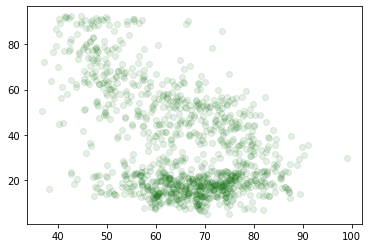

In [15]:
plt.scatter(x['air_temp_9am'],y,color="darkgreen", label="Data", alpha=.1)

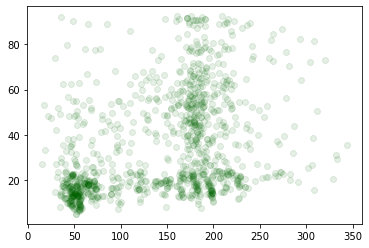

In [16]:
plt.scatter(x['avg_wind_direction_9am'],y,color="darkgreen", label="Data", alpha=.1)

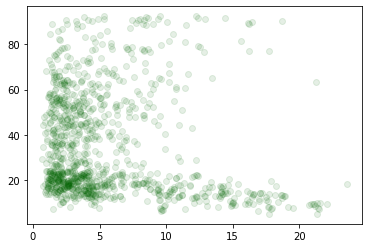

In [17]:
plt.scatter(x['avg_wind_speed_9am'],y,color="darkgreen", label="Data", alpha=.1)

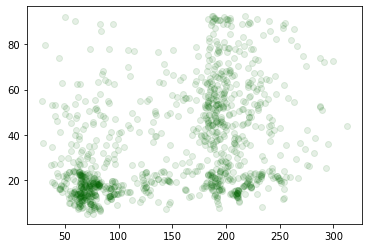

In [18]:
plt.scatter(x['max_wind_direction_9am'],y,color="darkgreen", label="Data", alpha=.1)

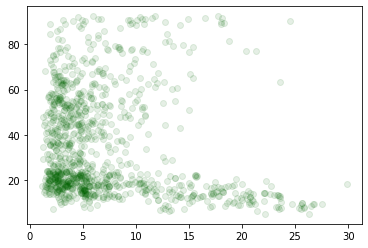

In [19]:
plt.scatter(x['max_wind_speed_9am'],y,color="darkgreen", label="Data", alpha=.1)

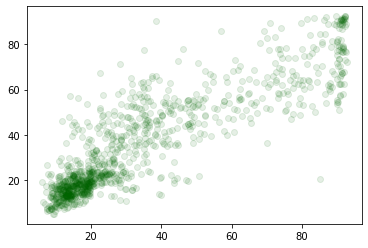

In [20]:
plt.scatter(x['relative_humidity_9am'],y,color="darkgreen", label="Data", alpha=.1)

<h3>Separamos los datos de entrenamiento y de prueba, manejando una relación de 70% de entrenamiento y 30% para testing</h3>

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=324)

<h3>Debido a que el rango de valores entre las features es un poco diferente, podemos utilizar un escalador para homogeneizar 
    los datos</h3>

In [22]:
scale = preprocessing.StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)


<h3>Comenzamos con el entrenamiento del modelo, al cual le pasamos los datos de entrenamiento...</h3>

In [23]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

<h3>Ahora vamos al testing y le pasamos los datos de testeo...</h3>

In [24]:
x_test=scale.transform(x_test)
y_prediction = regressor.predict(x_test)

<h3>Calculamos en error cuadrático medio para ver que tan precisa fue la predicción...</h3>

In [25]:
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred = y_prediction))
regressor.score(x_test, y_test)

0.814604054492224

In [26]:
print ( RMSE )

9.569374524572197


In [27]:
y_test.shape

(320, 1)

In [28]:
y_prediction.shape


(320, 1)

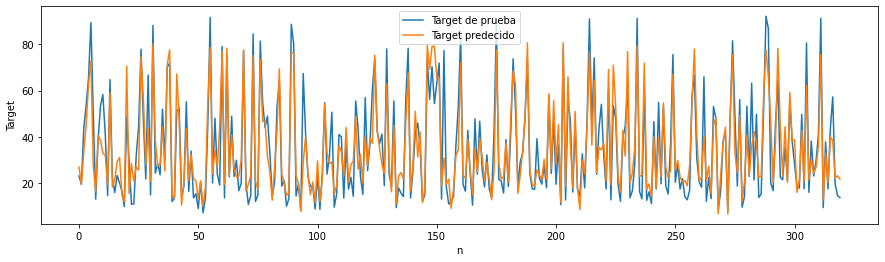

In [29]:
n = len(y_test)
t = np.array(range(n))
plt.figure(figsize=(15, 4))
plt.plot(t, y_test, label="Target de prueba")
plt.plot(t, y_prediction, label="Target predecido")
plt.legend()
plt.xlabel("n")
plt.ylabel("Target")
plt.show()